In [1]:
import pandas as pd
import numpy as np
from PIL import Image


# Các bước: Process


## 1. Read/write Data

## 2. Data cleaning (làm sạch dữ liệu):
. Dữ liệu ban đầu có thể: 
- Thiếu giá trị (null)
- Có giá trị ngoại lai (các giá trị cách biệt rất lớn với các giá trị còn lại: vd: tuổi sv đa phần là 18-22 nhưng có đứa lại là 200 tuổi:))
- Có chứa các giá trị ko hợp lệ (tuổi, cân nặng là số âm,...)
- Chức các giá trị NaN (np.NaN), None

### => giải pháp:
. Thay thế giá trị 
. Điền dữ liệu phía trên/dưới điền zô ô lỗi
. Loại bỏ fied (loại cái ô lỗi)
. Nội suy giá trị: Dùng hàm nội suy để tính toán ra giá trị bị thiếu để điền zô

# 3. Data Visualiation (Trực quan hóa dữ liệu)
. Có thể trực quan thành đồ thị (dùng matplotlip or seaborn)

# 4. Thao tác dữ liệu

# 1. Read/Write Data
## Đọc file CSV

#### đọc file bình thường

In [3]:
df = pd.read_csv('staffInfo.csv')
df

,Name,Age,Salary
0,Trung,22,3000
1,Quân,24,1000
2,Trúc,20,800
3,Thịnh,27,1200
4,Quỳnh,30,1100


#### Đọc file ko tiêu đề, có cột index

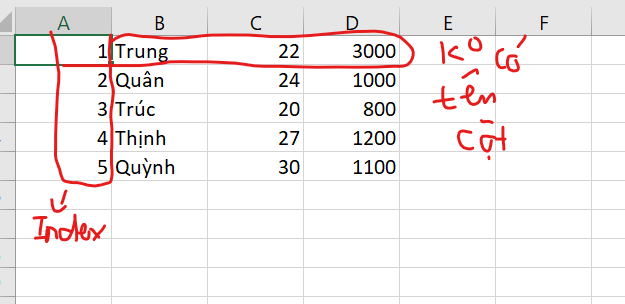

In [4]:
image = Image.open('csv_kotieude.png')
image

In [5]:
df1 = pd.read_csv('staffInfo_index.csv')
df1

###fix:
df2 = pd.read_csv('staffInfo_index.csv', header = None, index_col= 0) #index_col = 0: cột[0] là cột index
df2

,1,2,3
0,,,
1,Trung,22,3000
2,Quân,24,1000
3,Trúc,20,800
4,Thịnh,27,1200
5,Quỳnh,30,1100


#### file có định dạng ngăn cách bởi ;
vd: csv bình thường: họ tên,tuổi,lương
        
    kiểu kỳ quái: họ tên;tuổi;lương


In [6]:
df3 = pd.read_csv('staffInfo_kyquai.csv')
print(df3)

#fix
df4 = pd.read_csv('staffInfo_kyquai.csv', sep = ';')
df4

  Name;Age;Salary
0   Trung;22;3000
1    Quân;24;1000
2     Trúc;20;800
3   Thịnh;27;1200
4   Quỳnh;30;1100


,Name,Age,Salary
0,Trung,22,3000
1,Quân,24,1000
2,Trúc,20,800
3,Thịnh,27,1200
4,Quỳnh,30,1100


#### lấy ra 2 cột mà hoyy

In [7]:
df5 = pd.read_csv('staffInfo.csv', usecols = [0,2])
df5

,Name,Salary
0,Trung,3000
1,Quân,1000
2,Trúc,800
3,Thịnh,1200
4,Quỳnh,1100


#### ghi dataframe vào file

In [8]:
dfx = pd.DataFrame({
    'ID': ['nv1', 'nv2', 'nv3', 'nv4', 'nv5', 'nv6'],
    'Name': ['Trung', 'Quân', 'Hải', 'Thanh', 'Phát', np.NaN]
})
dfx[1:].to_csv('output.csv')

dfx.to_csv('output2.csv', sep = ';') #lưu csv với ngăn cách là dấu ;

In [9]:
dfx_read = pd.read_csv('output.csv')
dfx_read

,Unnamed: 0,ID,Name
0,1,nv2,Quân
1,2,nv3,Hải
2,3,nv4,Thanh
3,4,nv5,Phát
4,5,nv6,NaN


### đọc file excel

In [10]:
df5 = pd.read_excel('staffInfo_excel.xlsx', skiprows = 2)
df5

#tương đương:))
df6 = pd.read_excel('staffInfo_excel.xlsx', header = 2)
df6


,Unnamed: 0,Unnamed: 1,Name,Age,Salary,index
0,NaN,NaN,Trung,22,3000,1
1,NaN,NaN,Quân,24,1000,2
2,NaN,NaN,Trúc,20,800,3
3,NaN,NaN,Thịnh,27,1200,4
4,NaN,NaN,Quỳnh,30,1100,5


In [11]:
# đọc sheet khác
df7 = pd.read_excel('staffInfo_excel.xlsx', sheet_name = 'Sheet_3', skiprows = 2, usecols=[2,3,4,5] , index_col=3)
df7

#save file
#df7.to_excel('staffInfo_excel.xlsx', 'Sheet_3', ) #lưu tại sheet_3

,Name,Age,Salary
index,,,
1,Trung,22,3000
2,Quân,24,1000
3,Trúc,20,800
4,Thịnh,27,1200
5,Quỳnh,30,1100


### read file với các dòng đầu ko phải dữ liệu (mô tả)


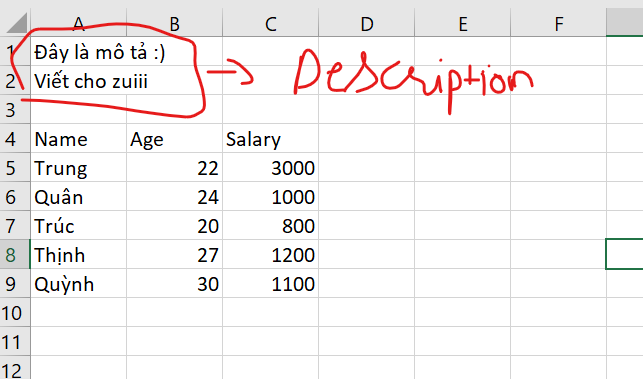

In [12]:
 Image.open('description.png')

In [13]:
### 2 dòng đầu là mô tả
df2 = pd.read_csv('staffInfoDescription.csv', header = 2) #2 dòng đầu là description
print(df2)

#cách 2
df3 = pd.read_csv('staffInfoDescription.csv', skiprows = 2) #bỏ qua 2 dòng đầu
df3

    Name  Age  Salary
0  Trung   22    3000
1   Quân   24    1000
2   Trúc   20     800
3  Thịnh   27    1200
4  Quỳnh   30    1100


,Name,Age,Salary
0,Trung,22,3000
1,Quân,24,1000
2,Trúc,20,800
3,Thịnh,27,1200
4,Quỳnh,30,1100


### lấy 2 trên 3 cột

In [14]:
df4 = pd.read_csv('staffInfoDescription.csv', skiprows = 2, usecols= [0,1])
df4

,Name,Age
0,Trung,22
1,Quân,24
2,Trúc,20
3,Thịnh,27
4,Quỳnh,30


In [15]:
df = df.assign(Working = [8, 10, np.NaN, np.NaN, 8])
df

,Name,Age,Salary,Working
0,Trung,22,3000,8.0
1,Quân,24,1000,10.0
2,Trúc,20,800,NaN
3,Thịnh,27,1200,NaN
4,Quỳnh,30,1100,8.0


### sau khi read file thì nên ktra lại info của df đó

In [16]:
df.info

<bound method DataFrame.info of     Name  Age  Salary  Working
0  Trung   22    3000      8.0
1   Quân   24    1000     10.0
2   Trúc   20     800      NaN
3  Thịnh   27    1200      NaN
4  Quỳnh   30    1100      8.0>

# 2. Data Cleaning (Làm sạch Data)

In [17]:
data = {
    'ID': pd.Series(['A01', 'A02', 'A03', 'A04', 'A05']),
    'Name': pd.Series(['Trung', 'Quân', 'Thịnh', 'Thắng', 'Huy']),
    'Age': pd.Series([22, 24, 23, 27, 9999]),
    'Salary': pd.Series([5000, 300, np.NaN, 380, 1200]),
    'Experience': pd.Series([1, 2, 7, 2, np.NaN])
}

df = pd.DataFrame(data)
df

,ID,Name,Age,Salary,Experience
0,A01,Trung,22,5000.0,1.0
1,A02,Quân,24,300.0,2.0
2,A03,Thịnh,23,NaN,7.0
3,A04,Thắng,27,380.0,2.0
4,A05,Huy,9999,1200.0,NaN


### 1. thay thế

In [18]:
#thay thế tất cả giá trị
#df.replace(9999, 0, inplace = True)
#df

#thay thế cho 1 cột mà hoy
df['Age'].replace(9999, 0, inplace = True)
df

df.replace(np.NaN, 0, inplace = True)
df

,ID,Name,Age,Salary,Experience
0,A01,Trung,22,5000.0,1.0
1,A02,Quân,24,300.0,2.0
2,A03,Thịnh,23,0.0,7.0
3,A04,Thắng,27,380.0,2.0
4,A05,Huy,0,1200.0,0.0


In [19]:
data = {
    'ID': pd.Series(['A01', 'A02', 'A03', 'A04', 'A05']),
    'Name': pd.Series(['Trung', 'Quân', 'Thịnh', 'Thắng', 'Huy']),
    'Age': pd.Series([22, 24, 23, 27, 9999]),
    'Salary': pd.Series([5000, 300, np.NaN, 380, 1200]),
    'Experience': pd.Series([1, 2, 7, 2, np.NaN])
}

df = pd.DataFrame(data)
df

,ID,Name,Age,Salary,Experience
0,A01,Trung,22,5000.0,1.0
1,A02,Quân,24,300.0,2.0
2,A03,Thịnh,23,NaN,7.0
3,A04,Thắng,27,380.0,2.0
4,A05,Huy,9999,1200.0,NaN


In [20]:
##thay thế với giá trị null (NaN)
#lấy dòng trên (có giá trị != null) điền xuống dòng dưới (có giá trị null)
df = df.fillna(method ='ffill')
df

,ID,Name,Age,Salary,Experience
0,A01,Trung,22,5000.0,1.0
1,A02,Quân,24,300.0,2.0
2,A03,Thịnh,23,300.0,7.0
3,A04,Thắng,27,380.0,2.0
4,A05,Huy,9999,1200.0,2.0


In [21]:
data = {
    'ID': pd.Series(['A01', 'A02', 'A03', 'A04', 'A05']),
    'Name': pd.Series(['Trung', 'Quân', 'Thịnh', 'Thắng', 'Huy']),
    'Age': pd.Series([22, 24, 23, 27, 9999]),
    'Salary': pd.Series([5000, 300, np.NaN, 380, 1200]),
    'Experience': pd.Series([1, 2, 7, 2, np.NaN])
}

df = pd.DataFrame(data)
df

,ID,Name,Age,Salary,Experience
0,A01,Trung,22,5000.0,1.0
1,A02,Quân,24,300.0,2.0
2,A03,Thịnh,23,NaN,7.0
3,A04,Thắng,27,380.0,2.0
4,A05,Huy,9999,1200.0,NaN


In [22]:
##thay thế với giá trị null (NaN)
#lấy dòng dưới (có giá trị != null) điền xuống dòng trên (có giá trị null)
df = df.fillna(method ='backfill')
df



,ID,Name,Age,Salary,Experience
0,A01,Trung,22,5000.0,1.0
1,A02,Quân,24,300.0,2.0
2,A03,Thịnh,23,380.0,7.0
3,A04,Thắng,27,380.0,2.0
4,A05,Huy,9999,1200.0,NaN


In [23]:
data = {
    'ID': pd.Series(['A01', 'A02', 'A03', 'A04', 'A05']),
    'Name': pd.Series(['Trung', 'Quân', 'Thịnh', 'Thắng', 'Huy']),
    'Age': pd.Series([22, 24, 23, 27, 9999]),
    'Salary': pd.Series([5000, 300, np.NaN, 380, 1200]),
    'Experience': pd.Series([1, 2, 7, 2, np.NaN])
}

df = pd.DataFrame(data)
print(df)

# thay thế tất cả giá trị null = 0
df = df.fillna(0)
df

    ID   Name   Age  Salary  Experience
0  A01  Trung    22  5000.0         1.0
1  A02   Quân    24   300.0         2.0
2  A03  Thịnh    23     NaN         7.0
3  A04  Thắng    27   380.0         2.0
4  A05    Huy  9999  1200.0         NaN


,ID,Name,Age,Salary,Experience
0,A01,Trung,22,5000.0,1.0
1,A02,Quân,24,300.0,2.0
2,A03,Thịnh,23,0.0,7.0
3,A04,Thắng,27,380.0,2.0
4,A05,Huy,9999,1200.0,0.0


In [24]:
data = {
    'ID': pd.Series(['A01', 'A02', 'A03', 'A04', 'A05']),
    'Name': pd.Series(['Trung', 'Quân', 'Thịnh', 'Thắng', 'Huy']),
    'Age': pd.Series([22, 24, 23, 27, 9999]),
    'Salary': pd.Series([5000, 300, np.NaN, 380, 1200]),
    'Experience': pd.Series([1, 2, 7, 2, np.NaN])
}

df = pd.DataFrame(data)
print(df)

##---------Thay thế giá trị null theo kiểu hợp lý hơn nè--------##

maxAge = df['Age'].max()  
avgSalary = df['Salary'].mean()
medianExperience = df['Experience'].median()

#thay null trong age, salary, experience = maxAge, averageSalary, medianExperience 
df = df.fillna(value={'Age': maxAge, 'Salary': avgSalary, 'Experience': medianExperience})
df

    ID   Name   Age  Salary  Experience
0  A01  Trung    22  5000.0         1.0
1  A02   Quân    24   300.0         2.0
2  A03  Thịnh    23     NaN         7.0
3  A04  Thắng    27   380.0         2.0
4  A05    Huy  9999  1200.0         NaN


,ID,Name,Age,Salary,Experience
0,A01,Trung,22,5000.0,1.0
1,A02,Quân,24,300.0,2.0
2,A03,Thịnh,23,1720.0,7.0
3,A04,Thắng,27,380.0,2.0
4,A05,Huy,9999,1200.0,2.0


### xóa các dòng/cột null

In [30]:
#xóa các dòng có giá trị null
df.dropna(axis = 0, inplace = True)

#xóa các cột có giá trị null
df.dropna(axis = 1, inplace = True)



### xử lý dữ liệu trùng

In [41]:
data = {
    'ID': pd.Series(['A01', 'A02', 'A03', 'A04', 'A05', 'A01']),
    'Name': pd.Series(['Trung', 'Quân', 'Thịnh', 'Thắng', 'Huy', 'Trung']),
    'Age': pd.Series([22, 24, 23, 27, 9999, 22]),
    'Salary': pd.Series([5000, 300, np.NaN, 380, 1200, 5000]),
    'Experience': pd.Series([1, 2, 7, 2, np.NaN, 1])
}

df = pd.DataFrame(data)
print(df)
df.duplicated()  ##các dòng trả về false thì ko có dòng nào trùng:), True nếu dòng thứ i đó trùng


# xóa các dòng trùng (có thể ktra trên các cột)
dfFix = df.drop_duplicates()
dfFix

    ID   Name   Age  Salary  Experience
0  A01  Trung    22  5000.0         1.0
1  A02   Quân    24   300.0         2.0
2  A03  Thịnh    23     NaN         7.0
3  A04  Thắng    27   380.0         2.0
4  A05    Huy  9999  1200.0         NaN
5  A01  Trung    22  5000.0         1.0


,ID,Name,Age,Salary,Experience
0,A01,Trung,22,5000.0,1.0
1,A02,Quân,24,300.0,2.0
2,A03,Thịnh,23,NaN,7.0
3,A04,Thắng,27,380.0,2.0
4,A05,Huy,9999,1200.0,NaN


### xử dụng nội suy tuyến tính để loại bỏ null

In [42]:
data = {
    'ID': pd.Series(['A01', 'A02', 'A03', 'A04', 'A05', 'A01']),
    'Name': pd.Series(['Trung', 'Quân', 'Thịnh', 'Thắng', 'Huy', 'Trung']),
    'Age': pd.Series([22, 24, 23, 27, 9999, 22]),
    'Salary': pd.Series([5000, 300, np.NaN, 380, 1200, 5000]),
    'Experience': pd.Series([1, 2, 7, 2, np.NaN, 1])
}

df = pd.DataFrame(data)
print(df)

df.interpolate(inplace = True)
df

    ID   Name   Age  Salary  Experience
0  A01  Trung    22  5000.0         1.0
1  A02   Quân    24   300.0         2.0
2  A03  Thịnh    23     NaN         7.0
3  A04  Thắng    27   380.0         2.0
4  A05    Huy  9999  1200.0         NaN
5  A01  Trung    22  5000.0         1.0


,ID,Name,Age,Salary,Experience
0,A01,Trung,22,5000.0,1.0
1,A02,Quân,24,300.0,2.0
2,A03,Thịnh,23,340.0,7.0
3,A04,Thắng,27,380.0,2.0
4,A05,Huy,9999,1200.0,1.5
5,A01,Trung,22,5000.0,1.0


In [46]:
### sử dụng map
data = {
    'ID': pd.Series(['A01', 'A02', 'A03', 'A04', 'A05', 'A01']),
    'Name': pd.Series(['Trung', 'Quân', 'Thịnh', 'Thắng', 'Huy', 'Trung']),
    'Age': pd.Series([22, 24, 23, 27, 9999, 22]),
    'Salary': pd.Series([5000, 300, np.NaN, 380, 1200, 5000]),
    'Experience': pd.Series([1, 2, 7, 2, np.NaN, 1]),
    'Department': pd.Series(['IT', 'KT', 'LT', 'PV', 'HR', 'IT'])
}

df = pd.DataFrame(data)

Department = {
    'KT' : 'Kế Toán',
    'IT' : 'Kỹ Thuật',
    'LT' : 'Lễ Tân',
    'PV' : 'Phỏng Vấn',
    'HR' : 'Nhân Sự'
}

df['Department'] = df['Department'].map(Department)
df

,ID,Name,Age,Salary,Experience,Department
0,A01,Trung,22,5000.0,1.0,Kỹ Thuật
1,A02,Quân,24,300.0,2.0,Kế Toán
2,A03,Thịnh,23,NaN,7.0,Lễ Tân
3,A04,Thắng,27,380.0,2.0,Phỏng Vấn
4,A05,Huy,9999,1200.0,NaN,Nhân Sự
5,A01,Trung,22,5000.0,1.0,Kỹ Thuật


## 3. Trực quan hóa

### Bar plot: biểu đồ cột

In [82]:

data = {
    'ID': pd.Series(['A01', 'A02', 'A03', 'A04', 'A05', 'A06']),
    'Name': pd.Series(['Trung', 'Quân', 'Thịnh', 'Thắng', 'Huy', 'An']),
    'Age': pd.Series([22, 24, 23, 27, 29, 21]),
    'Salary': pd.Series([5000, 300, 200, 380, 1200, 500]),
    'Experience': pd.Series([1, 2, 7, 2, np.NaN, 1]),
    'Department': pd.Series(['IT', 'KT', 'LT', 'PV', 'HR', 'IT'])
}
df = pd.DataFrame(data)

<AxesSubplot:>

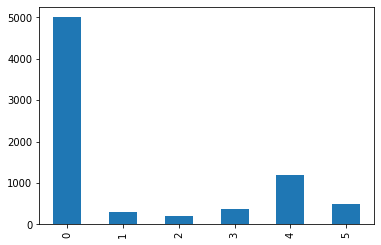

In [60]:
df['Salary'].plot.bar()

<AxesSubplot:>

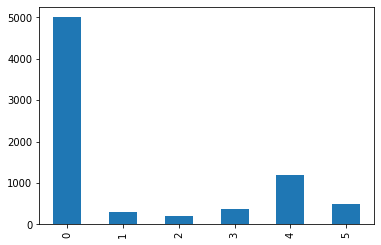

In [62]:
#tương tự nè
df['Salary'].plot(kind = 'bar')

<AxesSubplot:>

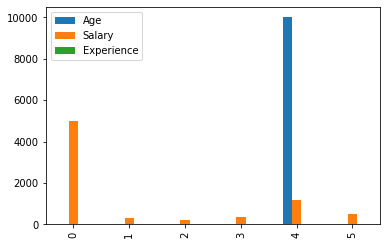

In [63]:
#vẽ tất cả các column có giá trị là số
df.plot.bar()

<AxesSubplot:>

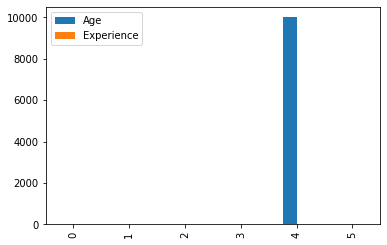

In [65]:
df[['Age', 'Experience']].plot.bar()

<AxesSubplot:>

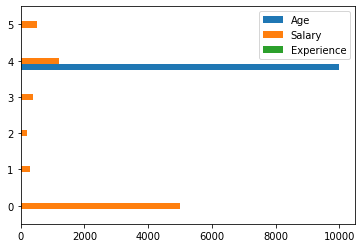

In [66]:
#cột mà nằm ngang:))
df.plot.barh()

### Boxplot: biểu đồ hộp
dùng để ktra dữ liệu có tồn tại outlier hay ko

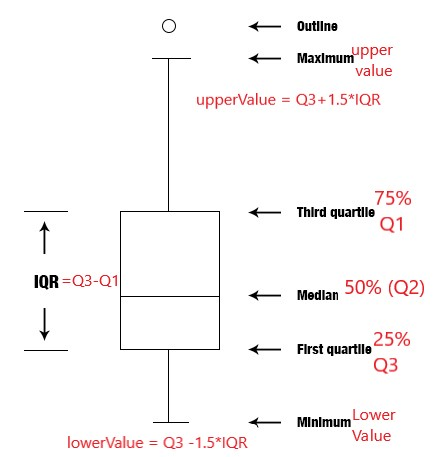

In [73]:
Image.open('Box_plot_description.jpg')

<AxesSubplot:>

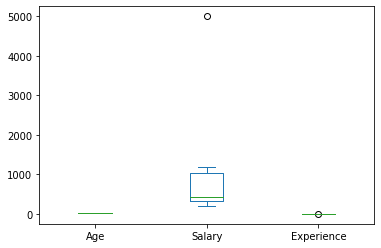

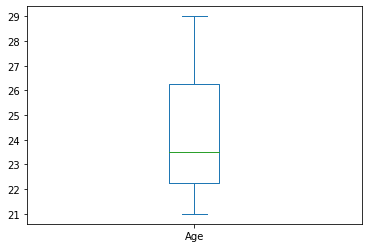

In [86]:
df.plot.box()

df[["Age"]].plot.box()

## Histogram
. Dạng phân phối tần xuất của 1 tập dữ liệu liên tục
- xem dc tần xuất suất hiện, phân bổ của dữ liệu
- xem dc tỉ lệ xuất hiện của dữ liệu

<AxesSubplot:ylabel='Frequency'>

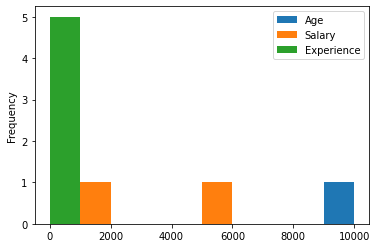

In [76]:
df.plot.hist()

<AxesSubplot:ylabel='Frequency'>

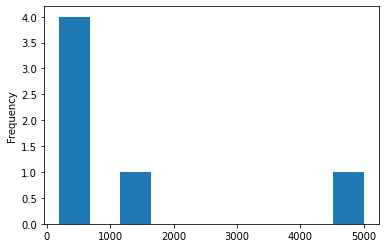

In [78]:
df['Salary'].plot.hist()

## biểu đồ đường thẳng: plot
- Xem sự thay đổi dữ liệu theo thời gian

<AxesSubplot:>

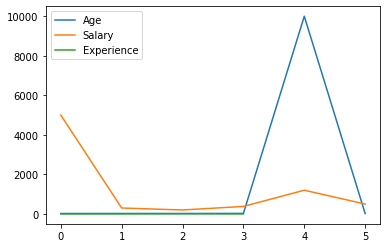

In [80]:
df.plot()

<AxesSubplot:>

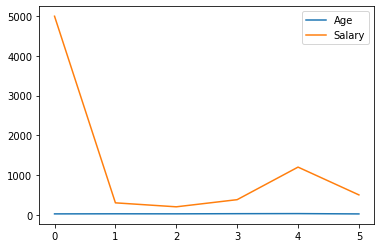

In [85]:
df[['Age', 'Salary']].plot()

In [84]:
df

,ID,Name,Age,Salary,Experience,Department
0,A01,Trung,22,5000,1.0,IT
1,A02,Quân,24,300,2.0,KT
2,A03,Thịnh,23,200,7.0,LT
3,A04,Thắng,27,380,2.0,PV
4,A05,Huy,29,1200,NaN,HR
5,A06,An,21,500,1.0,IT


## biểu đồ tròn: làm báo cáo, thống kê nhanh...

<AxesSubplot:ylabel='Age'>

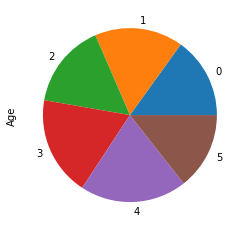

In [87]:
df['Age'].plot.pie()

# 4. Thao tác dữ liệu

In [90]:
data = {
    'ID': pd.Series(['A01', 'A02', 'A03', 'A04', 'A05', 'A06']),
    'Name': pd.Series(['Trung', 'Quân', 'Thịnh', 'Thắng', 'Huy', 'An']),
    'Age': pd.Series([22, 24, 23, 27, 29, 21]),
    'Salary': pd.Series([5000, 300, 200, 380, 1200, 500]),
    'Experience': pd.Series([1, 2, 7, 2, np.NaN, 1]),
    'Department': pd.Series(['IT', 'KT', 'LT', 'PV', 'HR', 'IT'])
}
df = pd.DataFrame(data)
df

,ID,Name,Age,Salary,Experience,Department
0,A01,Trung,22,5000,1.0,IT
1,A02,Quân,24,300,2.0,KT
2,A03,Thịnh,23,200,7.0,LT
3,A04,Thắng,27,380,2.0,PV
4,A05,Huy,29,1200,NaN,HR
5,A06,An,21,500,1.0,IT


In [92]:
#lấy ra các nhân viên có tuổi > 25
df[df['Age'] > 25]

df[(df['Age'] > 25) & (df['Age'] < 28 )]

,ID,Name,Age,Salary,Experience,Department
3,A04,Thắng,27,380,2.0,PV


## Thêm cột mới

In [94]:
df['Năm Sinh'] = 2021 - df['Age']
df

,ID,Name,Age,Salary,Experience,Department,Năm Sinh
0,A01,Trung,22,5000,1.0,IT,1999
1,A02,Quân,24,300,2.0,KT,1997
2,A03,Thịnh,23,200,7.0,LT,1998
3,A04,Thắng,27,380,2.0,PV,1994
4,A05,Huy,29,1200,NaN,HR,1992
5,A06,An,21,500,1.0,IT,2000


## Xóa cột/dòng

In [97]:
#xóa cột
df1 = df.drop('Năm Sinh', axis = 1)
df1

#xóa dòng
df1 = df.drop(2, axis = 0) #xóa dòng 2
df1

,ID,Name,Age,Salary,Experience,Department,Năm Sinh
0,A01,Trung,22,5000,1.0,IT,1999
1,A02,Quân,24,300,2.0,KT,1997
3,A04,Thắng,27,380,2.0,PV,1994
4,A05,Huy,29,1200,NaN,HR,1992
5,A06,An,21,500,1.0,IT,2000


## Group data và tổng hợp

In [108]:
# gom nhóm theo phòng ban
dfGroup = df.groupby(by='Department').count()

#set lại index nè
dfGroup2 = df.groupby(by='Department', as_index = False).count()[['Name']]
dfGroup2

#df.groupby(by=['Department', 'Experience']).count()

,Name
0,1
1,2
2,1
3,1
4,1


In [107]:
dfGroup[['Name']]

dfGroup['Name']



Department
HR    1
IT    2
KT    1
LT    1
PV    1
Name: Name, dtype: int64

## Gộp dữ liệu

In [2]:
data = {
    'ID': pd.Series(['A01', 'A02', 'A03', 'A04', 'A05', 'A06']),
    'Name': pd.Series(['Trung', 'Quân', 'Thịnh', 'Thắng', 'Huy', 'An']),
    'Age': pd.Series([22, 24, 23, 27, 29, 21]),
    'Salary': pd.Series([5000, 300, 200, 380, 1200, 500]),
    'Experience': pd.Series([1, 2, 7, 2, np.NaN, 1]),
    'Department': pd.Series(['IT', 'KT', 'LT', 'PV', 'HR', 'IT'])
}
df1 = pd.DataFrame(data)
df1

,ID,Name,Age,Salary,Experience,Department
0,A01,Trung,22,5000,1.0,IT
1,A02,Quân,24,300,2.0,KT
2,A03,Thịnh,23,200,7.0,LT
3,A04,Thắng,27,380,2.0,PV
4,A05,Huy,29,1200,NaN,HR
5,A06,An,21,500,1.0,IT


In [3]:
data = {
    'ID': pd.Series(['A011', 'A012', 'A013', 'A014', 'A015', 'A016']),
    'Name': pd.Series(['Trang', 'Quỳnh', 'Thành', 'Thanh', 'Hùng', 'Ánh']),
    'Age': pd.Series([32, 25, 21, 27, 22, 28]),
    'Salary': pd.Series([500, 300, 200, 380, 1200, 500]),
    'Experience': pd.Series([1, 2, 7, 2, np.NaN, 1]),
    'Department': pd.Series(['IT', 'KT', 'LT', 'PV', 'HR', 'IT'])
}
df2 = pd.DataFrame(data)
df2

,ID,Name,Age,Salary,Experience,Department
0,A011,Trang,32,500,1.0,IT
1,A012,Quỳnh,25,300,2.0,KT
2,A013,Thành,21,200,7.0,LT
3,A014,Thanh,27,380,2.0,PV
4,A015,Hùng,22,1200,NaN,HR
5,A016,Ánh,28,500,1.0,IT


In [5]:
#Gộp các cột lại (merge các cột lại)
dfNew_col = pd.concat([df1, df2], axis = 1)
dfNew_col

,ID,Name,Age,Salary,Experience,Department,ID,Name,Age,Salary,Experience,Department
0,A01,Trung,22,5000,1.0,IT,A011,Trang,32,500,1.0,IT
1,A02,Quân,24,300,2.0,KT,A012,Quỳnh,25,300,2.0,KT
2,A03,Thịnh,23,200,7.0,LT,A013,Thành,21,200,7.0,LT
3,A04,Thắng,27,380,2.0,PV,A014,Thanh,27,380,2.0,PV
4,A05,Huy,29,1200,NaN,HR,A015,Hùng,22,1200,NaN,HR
5,A06,An,21,500,1.0,IT,A016,Ánh,28,500,1.0,IT


In [6]:
#Gộp các dòng lại (merge các dòng lại <=> thêm các dòng mới zô á)
dfNew_row = pd.concat([df1, df2], axis = 0)
dfNew_row

,ID,Name,Age,Salary,Experience,Department
0,A01,Trung,22,5000,1.0,IT
1,A02,Quân,24,300,2.0,KT
2,A03,Thịnh,23,200,7.0,LT
3,A04,Thắng,27,380,2.0,PV
4,A05,Huy,29,1200,NaN,HR
5,A06,An,21,500,1.0,IT
0,A011,Trang,32,500,1.0,IT
1,A012,Quỳnh,25,300,2.0,KT
2,A013,Thành,21,200,7.0,LT
3,A014,Thanh,27,380,2.0,PV


In [36]:
data1 = {
    'ID': pd.Series(['A01', 'A02', 'A03']),
    'Salary': pd.Series([5000, 300, 200]),
}
df1 = pd.DataFrame(data1)
df1


data2 = {
    'ID': pd.Series([np.NaN, 'A01', 'A02', 'A03', 'A07', 'A09']),
    'Name': pd.Series(['Trang', 'Quỳnh', 'Thành', 'Thanh', 'Hùng', 'Ánh']),
}
df2 = pd.DataFrame(data2)
df2

dfNew = pd.concat([df2, df1], axis = 1)
dfNew



,ID,Name,ID,Salary
0,NaN,Trang,A01,5000.0
1,A01,Quỳnh,A02,300.0
2,A02,Thành,A03,200.0
3,A03,Thanh,NaN,NaN
4,A07,Hùng,NaN,NaN
5,A09,Ánh,NaN,NaN


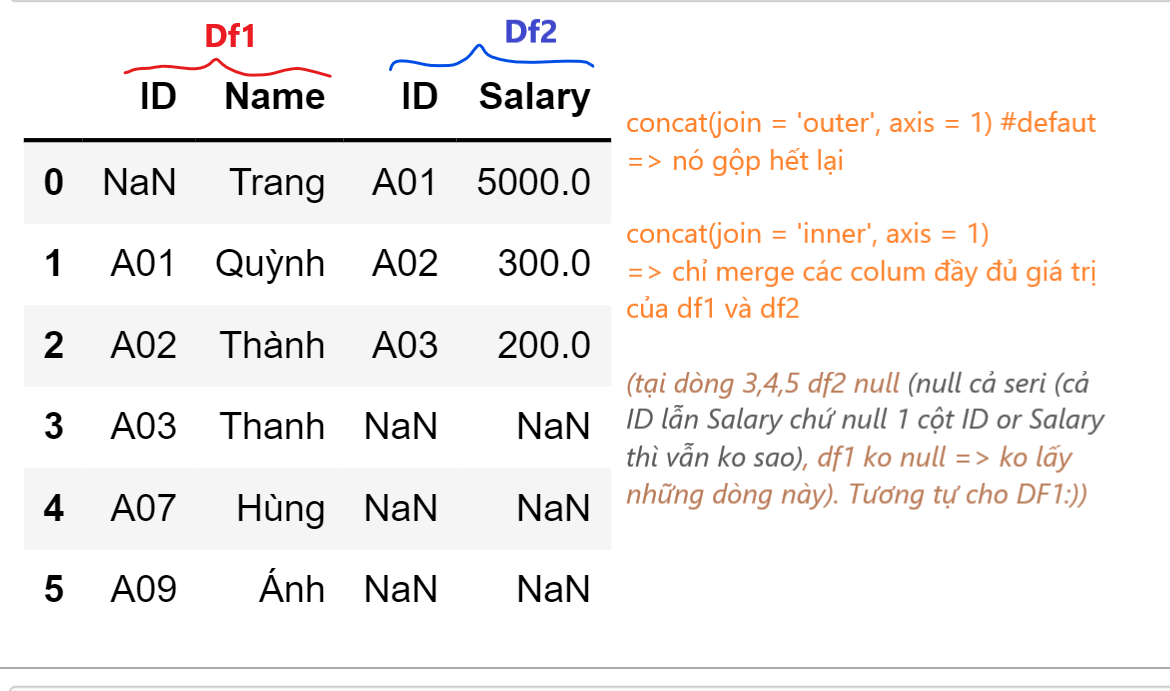

In [37]:
Image.open('inerjoin.png')

In [27]:
# dùng inner: với nó sẽ lấy các cột có đủ dữ liệu
dfNewInner = pd.concat([df1, df2], axis = 1, join = 'inner')
dfNewInner

,ID,Salary,ID,Name
0,A01,5000,NaN,Trang
1,A02,300,A01,Quỳnh
2,A03,200,A02,Thành


In [39]:
#append các rows :)) <=> concat(axis = 0)
dfNew = df1.append(df2)
dfNew

,ID,Salary,Name
0,A01,5000.0,NaN
1,A02,300.0,NaN
2,A03,200.0,NaN
0,NaN,NaN,Trang
1,A01,NaN,Quỳnh
2,A02,NaN,Thành
3,A03,NaN,Thanh
4,A07,NaN,Hùng
5,A09,NaN,Ánh


In [45]:
data1 = {
    'ID': pd.Series(['A01', 'A02', 'A03', 'A04']),
    'Salary': pd.Series([5000, 300, 200, 400]),
}
df1 = pd.DataFrame(data1)
df1


data2 = {
    'ID': pd.Series(['A01', 'A02', 'A03', 'A07', 'A09']),
    'Name': pd.Series(['Trang', 'Quỳnh', 'Thành', 'Thanh', 'Hùng', 'Ánh']),
}
df2 = pd.DataFrame(data2)
df2





,ID,Name
0,A01,Trang
1,A02,Quỳnh
2,A03,Thành
3,A07,Thanh
4,A09,Hùng
5,NaN,Ánh


In [46]:
#gộp các cột <=> concat(axis = 1)
dfNew = pd.merge(df1, df2)
dfNew

,ID,Salary,Name
0,A01,5000,Trang
1,A02,300,Quỳnh
2,A03,200,Thành


In [47]:
dfNew = pd.merge(df1, df2, how = 'outer')
dfNew

,ID,Salary,Name
0,A01,5000.0,Trang
1,A02,300.0,Quỳnh
2,A03,200.0,Thành
3,A04,400.0,NaN
4,A07,NaN,Thanh
5,A09,NaN,Hùng
6,NaN,NaN,Ánh


In [48]:
dfNew = pd.merge(df1, df2, how = 'left')
dfNew

,ID,Salary,Name
0,A01,5000,Trang
1,A02,300,Quỳnh
2,A03,200,Thành
3,A04,400,NaN


In [49]:
dfNew = pd.merge(df1, df2, how = 'right')
dfNew

,ID,Salary,Name
0,A01,5000.0,Trang
1,A02,300.0,Quỳnh
2,A03,200.0,Thành
3,A07,NaN,Thanh
4,A09,NaN,Hùng
5,NaN,NaN,Ánh


In [54]:
# df1 và df2 ko có cột chung:
data1 = {
    'ID': pd.Series(['A01', 'A02', 'A03', 'A04']),
    'Salary': pd.Series([5000, 300, 200, 400]),
}
df1 = pd.DataFrame(data1)
df1


data2 = {
    'Department': pd.Series(['A01', 'A02', 'A03', 'A07', 'A09']),
    'Name': pd.Series(['Trang', 'Quỳnh', 'Thành', 'Thanh', 'Hùng', 'Ánh']),
}
df2 = pd.DataFrame(data2)
df2


,Department,Name
0,A01,Trang
1,A02,Quỳnh
2,A03,Thành
3,A07,Thanh
4,A09,Hùng
5,NaN,Ánh


In [55]:
# ko có cột chung: (giống khóa ngoại nè:))) foreign key
dfNew = pd.merge(df1, df2, left_on = 'ID', right_on = 'Department')
dfNew

,ID,Salary,Department,Name
0,A01,5000,A01,Trang
1,A02,300,A02,Quỳnh
2,A03,200,A03,Thành


# xử lý chuỗi

In [56]:
data = {
    'ID': pd.Series(['A01', 'A02', 'A03', 'A04', 'A05', 'A06']),
    'Name': pd.Series(['Trung', 'Quân', 'Thịnh', 'Thắng', 'Huy', 'An']),
    'Age': pd.Series([22, 24, 23, 27, 29, 21]),
    'Salary': pd.Series([5000, 300, 200, 380, 1200, 500]),
    'Experience': pd.Series([1, 2, 7, 2, np.NaN, 1]),
    'Department': pd.Series(['IT', 'KT', 'LT', 'PV', 'HR', 'IT'])
}
df = pd.DataFrame(data)
df

,ID,Name,Age,Salary,Experience,Department
0,A01,Trung,22,5000,1.0,IT
1,A02,Quân,24,300,2.0,KT
2,A03,Thịnh,23,200,7.0,LT
3,A04,Thắng,27,380,2.0,PV
4,A05,Huy,29,1200,NaN,HR
5,A06,An,21,500,1.0,IT


In [59]:
#viết hoa lên nè
df['Name'] = df['Name'].str.upper()
df

,ID,Name,Age,Salary,Experience,Department
0,A01,TRUNG,22,5000,1.0,IT
1,A02,QUÂN,24,300,2.0,KT
2,A03,THỊNH,23,200,7.0,LT
3,A04,THẮNG,27,380,2.0,PV
4,A05,HUY,29,1200,NaN,HR
5,A06,AN,21,500,1.0,IT


In [62]:
# thay thế
df['Department'] = df['Department'].str.replace('IT', 'Technique')
df

,ID,Name,Age,Salary,Experience,Department
0,A01,TRUNG,22,5000,1.0,Technique
1,A02,QUÂN,24,300,2.0,KT
2,A03,THỊNH,23,200,7.0,LT
3,A04,THẮNG,27,380,2.0,PV
4,A05,HUY,29,1200,NaN,HR
5,A06,AN,21,500,1.0,Technique


## Extract (re)

In [68]:
data = {
    'Text': ['Đinh Viết Trung - 1999', 'Trương Gia Bảo - 1998', 'Lê Thị Đào- 1996', 'Nguyễn Tường Vy - 2000']
}

df = pd.DataFrame(data)
df

,Text
0,Đinh Viết Trung - 1999
1,Trương Gia Bảo - 1998
2,Lê Thị Đào- 1996
3,Nguyễn Tường Vy - 2000


In [70]:
df['Last Name'] = df['Text'].str.extract('(\w+)')
df

,Text,Last Name
0,Đinh Viết Trung - 1999,Đinh
1,Trương Gia Bảo - 1998,Trương
2,Lê Thị Đào- 1996,Lê
3,Nguyễn Tường Vy - 2000,Nguyễn


In [76]:
df['Năm Sinh'] = df['Text'].str.extract('(\d+)', expand = True) #true thì return về DataFrame
df

df['Năm Sinh'] = df['Text'].str.extract('(\d+)', expand = False) #False thì return về Series
df


#tương tự cái đầu nha
df['Năm Sinh 2'] = df['Text'].str.extract('(\d{4})') # lấy 4 số, \d là tìm số á
df



,Text,Last Name,Năm Sinh,Năm Sinh 2
0,Đinh Viết Trung - 1999,Đinh,1999,1999
1,Trương Gia Bảo - 1998,Trương,1998,1998
2,Lê Thị Đào- 1996,Lê,1996,1996
3,Nguyễn Tường Vy - 2000,Nguyễn,2000,2000


In [77]:
#df['First Name'] = df['Text'].str.extract('(\w{4:9})') # lấy 4 số, \d là tìm số á
#df

,Text,Last Name,Năm Sinh,Năm Sinh 2,First Name
0,Đinh Viết Trung - 1999,Đinh,1999,1999,NaN
1,Trương Gia Bảo - 1998,Trương,1998,1998,NaN
2,Lê Thị Đào- 1996,Lê,1996,1996,NaN
3,Nguyễn Tường Vy - 2000,Nguyễn,2000,2000,NaN
